# <center><B>DATASET</center>

1. [Importing Libraries](#importing-libraries)
2. [Loading the Dataset](#loading-the-dataset)
3. [Dataset Overview](#dataset-overview)
4. [Data Info](#data-info)
5. [Data Cleaning](#data-cleaning)
    - [Eliminating Duplicates](#eliminating-duplicates)
    - [Data Transformation: Date and Time Parsing](#data-transformation:-date-and-time-parsing)
    - [Checking for Null Values in Each Column](#checking-for-null-values-in-each-column)
    - [Dropping Unnecessary Columns](#dropping-unnecessary-columns)
    - [Examining Continuous Variables](#examining-continuous-variables)
6. [Print All Columns](#print-all-columns)
7. [Theme Setting](#theme-setting)
8. [Data Visualization: Using Plots to Find Relationships Between Features](#data-visualization)
    

<br>

 ## <b><a name="importing-libraries"></a>Importing Libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import MarkerCluster
import webbrowser
import datetime
from IPython.display import display

<br>

## <b><a name="loading-the-dataset"></a>Loading the Dataset


In [2]:
file_path = "database.csv"  # Update with your file path
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Desktop\\database.csv",dtype={25: str})

<br>

## <b><a name="dataset-overview"></a>Dataset Overview


In [3]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


<br>

## <B><a name="data-info"></a>Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

<br>

 ## <b><a name="data-cleaning"></a>Data Cleaning

<br>

#### <a name="eliminating-duplicates"></a>Eliminating Duplicates

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

<br>

#### <a name="checking-for-null-values-in-each-column"></a>Checking for Null Values in Each Column





In [6]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

<br>

#### <a name="data-transformation:-date-and-time-parsing"></a>Data Transformation: Date and Time Parsing

In [27]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['Weekday'] = df['Date'].dt.day_name() 


<br>

#### <a name="dropping-unnecessary-columns"></a>Dropping Unnecessary

In [8]:
columns_to_drop = ["Depth Error", "Depth Seismic Stations", "Magnitude Error", 
    "Magnitude Seismic Stations", "Azimuthal Gap", "Horizontal Distance", 
    "Horizontal Error", "ID", "Source", "Location Source", "Magnitude Source", "Status"]
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

In [9]:
critical_columns = ['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Type']
df_cleaned = df_cleaned.dropna(subset=critical_columns)

In [10]:
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23409 non-null  datetime64[ns]
 1   Time              23409 non-null  datetime64[ns]
 2   Latitude          23412 non-null  float64       
 3   Longitude         23412 non-null  float64       
 4   Type              23412 non-null  object        
 5   Depth             23412 non-null  float64       
 6   Magnitude         23412 non-null  float64       
 7   Magnitude Type    23409 non-null  object        
 8   Root Mean Square  17352 non-null  float64       
 9   Hour              23409 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 1.8+ MB


<br>

#### <a name="examining-continuous-variables"></a>Examining Continuous Variables

In [11]:
df.describe()


,Date,Time,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Hour
count,23409,23409,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23409.000000
mean,1993-02-18 00:22:56.701268736,1900-01-01 11:56:43.179546368,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784,11.449015
min,1965-01-02 00:00:00,1900-01-01 00:00:03,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,0.000000
25%,1981-04-11 00:00:00,1900-01-01 05:58:43,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000,5.000000
50%,1993-11-30 00:00:00,1900-01-01 11:54:56,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000,11.000000
75%,2005-09-09 00:00:00,1900-01-01 17:57:19,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000,17.000000
max,2016-12-30 00:00:00,1900-01-01 23:59:58,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000,23.000000
std,NaN,NaN,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545,6.890925


<br>

#### <a name="print-all-columns"></a>Print All Columns 


In [12]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status', 'Hour'],
      dtype='object')

<br>

#### <a name="theme-setting"></a>Theme Setting

In [41]:
sns.set_theme(style="whitegrid")

<br>

### <a name="data-visualization"></a>Data Visualization

<br>

 <a name="magnitude-over-time"></a>Magnitude Over Time

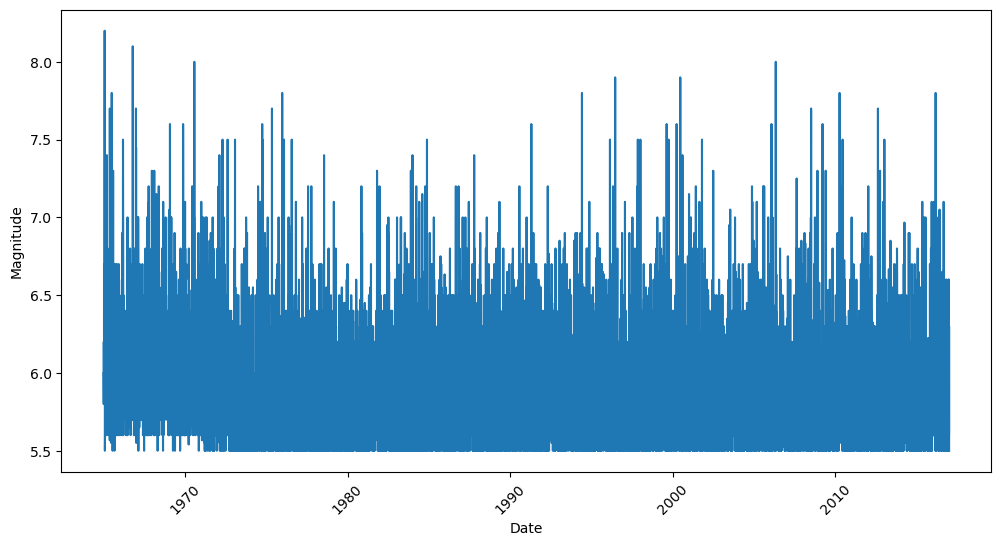

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Magnitude', ci=None)
plt.xticks(rotation=45)
plt.show()

<B>Observation:<br>

The line plot illustrates the trend of the Magnitude variable over time. Peaks and valleys in the plot indicate fluctuations in magnitude on specific dates, potentially corresponding to significant seismic events or other related occurrences.

<b>Conclusion:<br>

By visualizing the magnitude over time, we can identify periods of increased seismic activity. This plot helps in understanding how the magnitude varies on different dates, providing insight into patterns or anomalies that may be associated with specific events or trends.








<br>

<a name="relationships-between-magnitude-Depth-and-horizontal-distance"></a>Relationships Between Magnitude, Depth, and Horizontal Distance

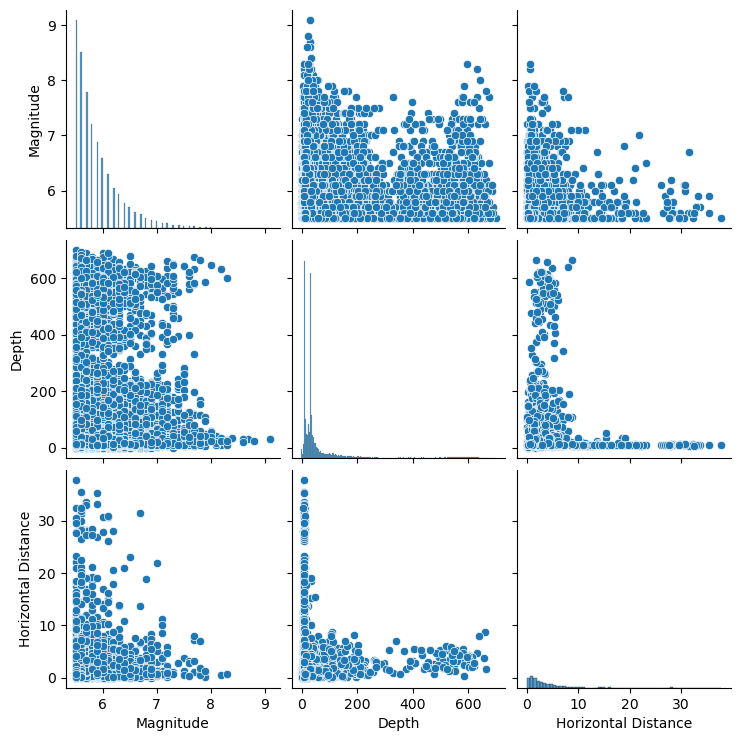

In [14]:
sns.pairplot(df[['Magnitude', 'Depth', 'Horizontal Distance']])
plt.show()

<B>Observation:<br>

The pairplot visualizes the relationships between the Magnitude, Depth, and Horizontal Distance variables. It shows the pairwise scatter plots along with the distribution of each variable. This reveals how each of these variables is distributed and how they correlate with one another.

<b>Conclusion:<br>

The pairplot suggests potential correlations between the variables, especially between Magnitude and Depth, where deeper events might be associated with higher magnitudes. The scatter plots help identify trends and outliers, providing insights into how these variables interact. Further statistical analysis could quantify the strength of these relationships and explore any hidden patterns.


<br>

<a name="magnitude-by-time-of-day"></a>Magnitude by Time of Day

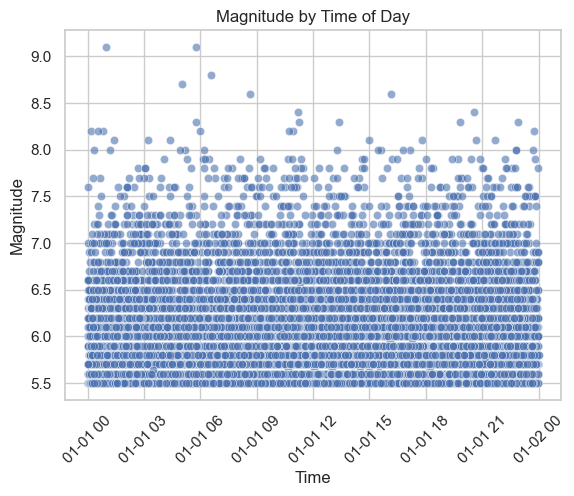

In [46]:
sns.scatterplot(x='Time', y='Magnitude', data=df,alpha=0.6)
plt.title('Magnitude by Time of Day')
plt.xticks(rotation=45)
plt.show()

<B>Observation:<br>

The scatter plot reveals how Magnitude varies throughout the day. The data points are spread across the time range, showing fluctuations in magnitude at different times, with some periods having higher or more concentrated magnitudes.

<b>Conclusion:<br>

This plot suggests that seismic or event magnitudes fluctuate at different times of the day, with no clear trend of uniformity. By analyzing the spread of magnitudes over time, we can identify specific time windows where more significant events might occur, which could be useful for understanding patterns of activity or predicting future occurrences.









<br>

<a name="time-vs-latitude"></a>Time vs Latitude

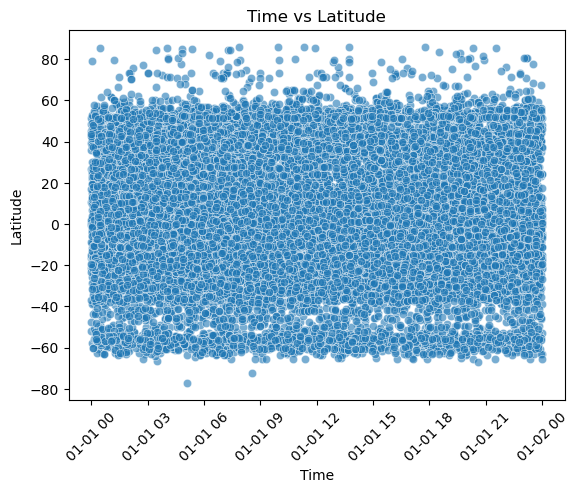

In [17]:
sns.scatterplot(data=df, x='Time', y='Latitude', alpha=0.6)
plt.title("Time vs Latitude")
plt.xlabel("Time")
plt.ylabel("Latitude")
plt.xticks(rotation=45)
plt.show()


<B>Observation:<br>

The scatter plot illustrates how Latitude varies with respect to Time. It shows that latitude values are spread across the time range, with some hours featuring clustered values while others show more spread, indicating geographic shifts throughout the day.

<b>Conclusion:<br>

This plot indicates that latitude positions change over time, possibly reflecting the movement or shift of events across different geographic regions. By examining the spread and clustering of latitude values, we can gain insights into the temporal patterns of geographic activity or movements in the dataset.


<br>

<a name="time-vs-longitude"></a> Time vs Longitude

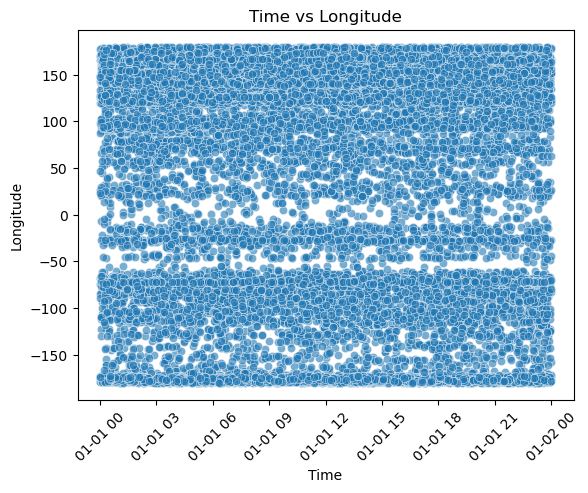

In [19]:
sns.scatterplot(data=df, x='Time', y='Longitude', alpha=0.6, palette="rocket")
plt.title("Time vs Longitude")
plt.xlabel("Time")
plt.ylabel("Longitude")
plt.xticks(rotation=45)
plt.show()


<B>Observation:<br>

The scatter plot visualizes the relationship between Time and Longitude, showing how longitude values change throughout the day. The distribution of data points indicates varying longitudes at different times, with some times having more concentrated values and others more spread out.

<b>Conclusion:<br>

This plot suggests that longitude values exhibit variability over time, potentially reflecting movements or shifts in the geographical locations of events. By analyzing the scatter of data points over time, we can identify trends or patterns in geographic distribution related to specific times of day, which could be useful for understanding spatial dynamics in the dataset.


<br>

<a name="magnitude-distribution-by-hour"></a>Magnitude Distribution by Hour

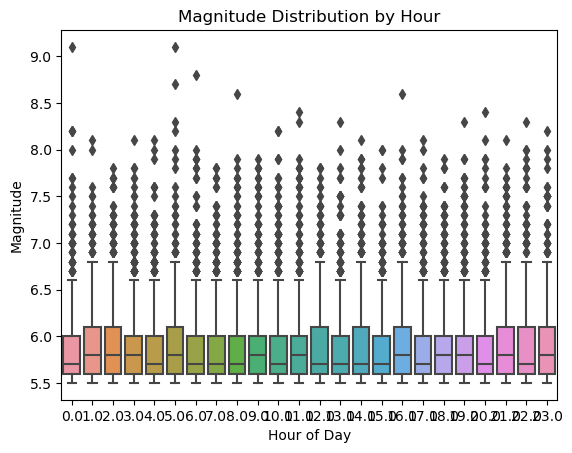

In [20]:
sns.boxplot(data=df, x='Hour', y='Magnitude')
plt.title("Magnitude Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Magnitude")
plt.show()

<B>Observation:<br>

The box plot shows how Magnitude varies across different hours of the day. It indicates that some hours experience larger magnitudes (larger interquartile ranges and higher outliers), while others have smaller or more consistent magnitudes.

<b>Conclusion:<br>

This plot suggests that seismic activity or event magnitude fluctuates throughout the day, with certain hours exhibiting more significant events. Analyzing the time-based distribution of magnitude can help in identifying patterns or peaks in seismic activity, which could be valuable for predictive modeling or resource planning.


<br>

<a name="time-vs-root-mean-square"></a>Time vs Root Mean Square

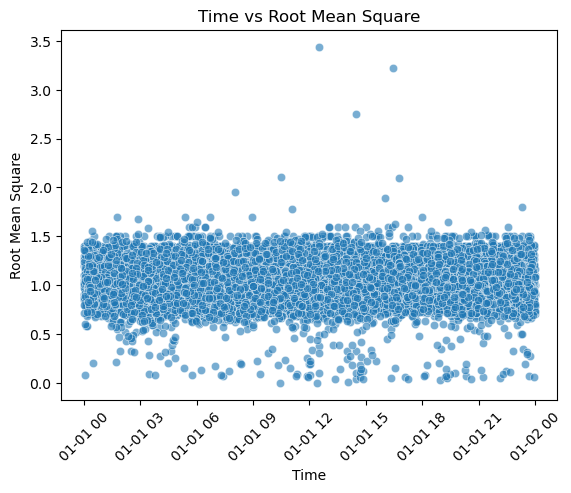

In [23]:
sns.scatterplot(data=df, x='Time', y='Root Mean Square', alpha=0.6)
plt.title("Time vs Root Mean Square")
plt.xlabel("Time")
plt.ylabel("Root Mean Square")
plt.xticks(rotation=45)
plt.show()


<B>Observation:<br>

The scatter plot shows the relationship between Time and Root Mean Square. It highlights how the Root Mean Square (a measure of signal strength or intensity) varies throughout the day, with scattered data points indicating fluctuations at different times.

<b>Conclusion:<br>

This plot suggests that the Root Mean Square varies over time, potentially reflecting different levels of activity or intensity at different times of the day. Observing these trends can help identify times of higher activity or intensity, which could be important for understanding the underlying patterns or events associated with this measure.


<br>

<a name="frequency-by-hour-and-event-type"></a>Frequency by Hour and Event Type

In [24]:
hour_type_counts = df.groupby(['Hour', 'Type']).size().unstack()


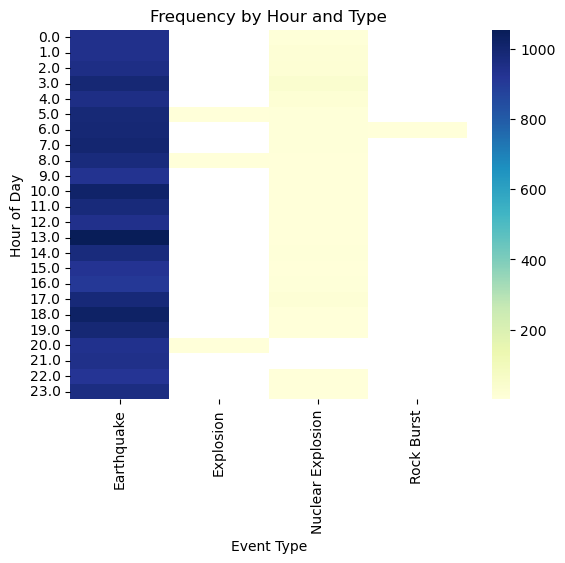

In [26]:
sns.heatmap(hour_type_counts, cmap='YlGnBu', annot=False, cbar=True)
plt.title("Frequency by Hour and Type")
plt.xlabel("Event Type")
plt.ylabel("Hour of Day")
plt.show()

<B>Observation:<br>

The heatmap visualizes the frequency of event types across different hours of the day. It shows patterns in event occurrences, highlighting which event types are more frequent at specific hours, with color intensity representing the frequency.

<b>Conclusion:<br>

This heatmap reveals the distribution of event types over the course of the day. It can help identify peak hours for specific event types, providing insights into daily trends and patterns of activity. Such information is valuable for understanding time-of-day effects or for planning resource allocation based on event occurrence patterns.


<br>

<a name="magnitude-distribution-by-weekday"></a> Magnitude Distribution by Weekday

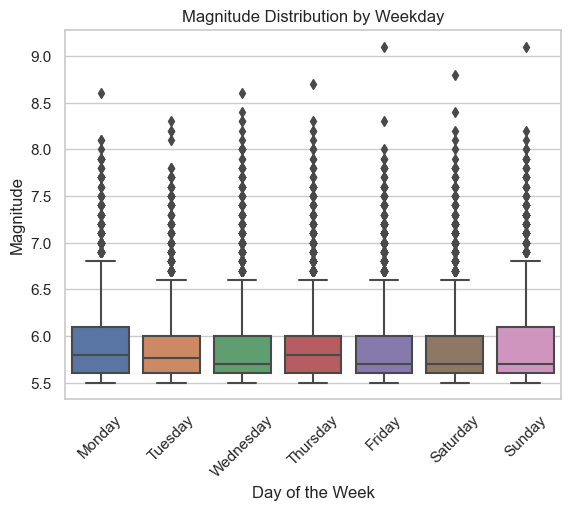

In [42]:
sns.boxplot(data=df, x='Weekday', y='Magnitude', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Magnitude Distribution by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Magnitude")
plt.xticks(rotation=45)
plt.show()

<B>Observation:<br>

The box plot shows the distribution of Magnitude across different days of the week. It reveals that certain weekdays have higher or more varied magnitudes, with some days having more outliers (indicating larger seismic events) compared to others.

<b>Conclusion:<br>

The plot suggests that the distribution of magnitudes is not uniform throughout the week, and some days might experience more significant seismic activity. This could indicate potential patterns related to specific events or cycles, which may warrant further investigation for weekly trends in magnitude.


<br>

<a name="date-vs-latitude-and-longitude"></a>Date vs Latitude and Longitude

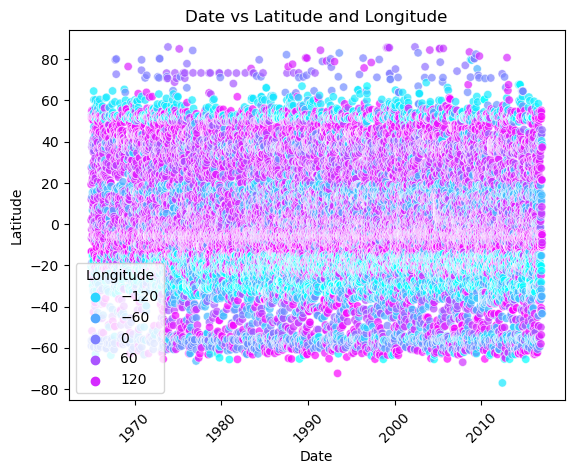

In [30]:
sns.scatterplot(data=df, x='Date', y='Latitude', hue='Longitude', palette='cool', alpha=0.7)
plt.title("Date vs Latitude and Longitude")


plt.xticks(rotation=45)
plt.show()

<B>Observation:<br>

The scatter plot shows the relationship between Date and Latitude, with the Longitude values represented by the color gradient. The plot reveals spatial patterns of events over time, with varying latitudes and longitudes across different dates.

<b>Conclusion:<br>

This plot helps visualize the geographic distribution of events over time. By color-coding longitude, it becomes easier to identify clusters or patterns in event locations. The variation in latitude and longitude over time can provide valuable insights into the spread or concentration of events across different regions.


<br>

 <a name="magnitude-distribution-over-dates"></a>Magnitude Distribution Over Dates

In [ ]:
sns.kdeplot(data=df, x='Date', y='Magnitude', fill=True, cmap="Blues")
plt.title("KDE of Magnitude Over Dates")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.xticks(rotation=45)
plt.show()


<B>Observation:<br>

The KDE (Kernel Density Estimate) plot illustrates the smooth distribution of Magnitude over time. It highlights areas where high-density magnitudes are observed, with the color gradient indicating the intensity of magnitude occurrences over time.

<b>Conclusion:<br>

This plot shows that certain periods have a higher concentration of seismic events with stronger magnitudes, while other times exhibit less activity. The smooth curve helps to identify trends and patterns in magnitude distribution, aiding in the detection of any potential clusters of significant seismic events over time.



<br>

 <a name="dept-distribution-by-month"></a>Depth Distribution by Month

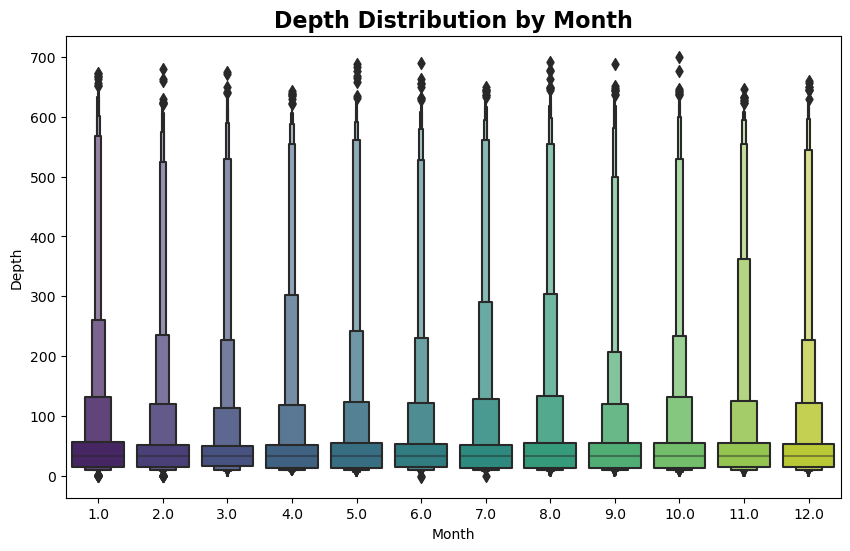

In [39]:
df['Month'] = df['Date'].dt.month  # Extract month
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='Month', y='Depth', palette='viridis')
plt.title("Depth Distribution by Month", fontsize=16, weight='bold')

plt.show()

<B>Observation:<br>

The boxen plot displays the distribution of Depth values across different months. It shows that the depth varies significantly, with some months exhibiting larger interquartile ranges and occasional outliers, particularly in certain months where deeper events seem more frequent.

<b>Conclusion:<br>

This plot reveals that depth distribution is not uniform across the year. Specific months may experience more intense or deeper events, while others show more consistent and shallow depths. This pattern can help identify seasonal or cyclical trends in depth, which could be useful for further investigations into environmental or geological factors.
